CSV path: /home/grenadi3/Project-8---Sports-Analysis/data/rawdata/NBA_2023_Shots.csv
   SEASON_1 SEASON_2     TEAM_ID           TEAM_NAME  PLAYER_ID  \
0      2023  2022-23  1610612764  Washington Wizards     203078   
1      2023  2022-23  1610612764  Washington Wizards     204001   
2      2023  2022-23  1610612764  Washington Wizards    1628420   
3      2023  2022-23  1610612764  Washington Wizards     204001   
4      2023  2022-23  1610612764  Washington Wizards    1630166   

          PLAYER_NAME POSITION_GROUP POSITION   GAME_DATE   GAME_ID  ...  \
0        Bradley Beal              G       SG  10-19-2022  22200004  ...   
1  Kristaps Porzingis              C        C  10-19-2022  22200004  ...   
2        Monte Morris              G       PG  10-19-2022  22200004  ...   
3  Kristaps Porzingis              C        C  10-19-2022  22200004  ...   
4         Deni Avdija              F       SF  10-19-2022  22200004  ...   

          BASIC_ZONE  ZONE_NAME ZONE_ABB       ZONE_RAN

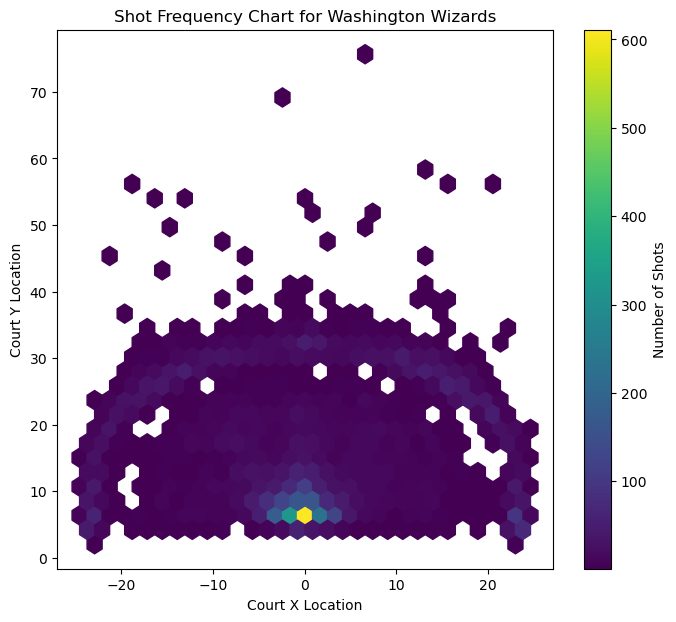

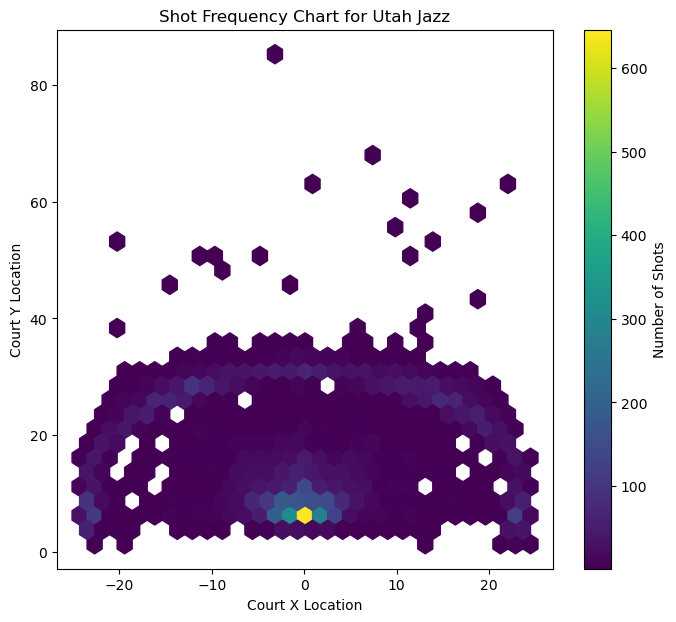

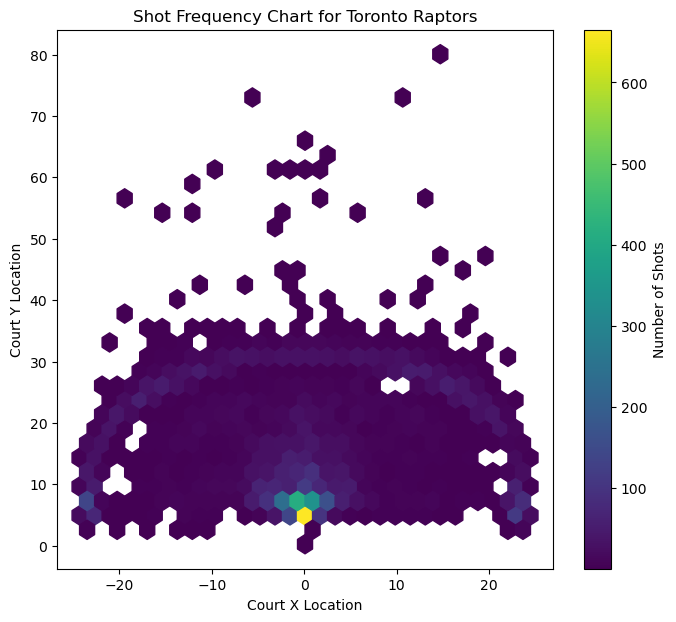

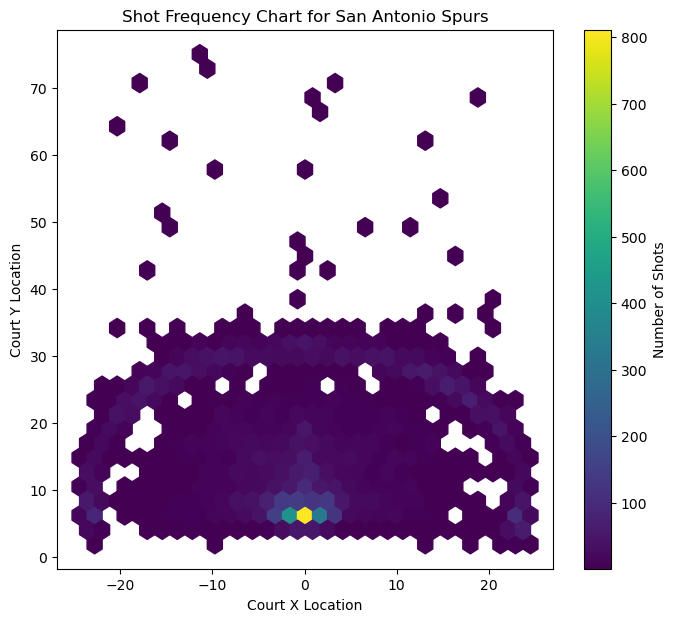

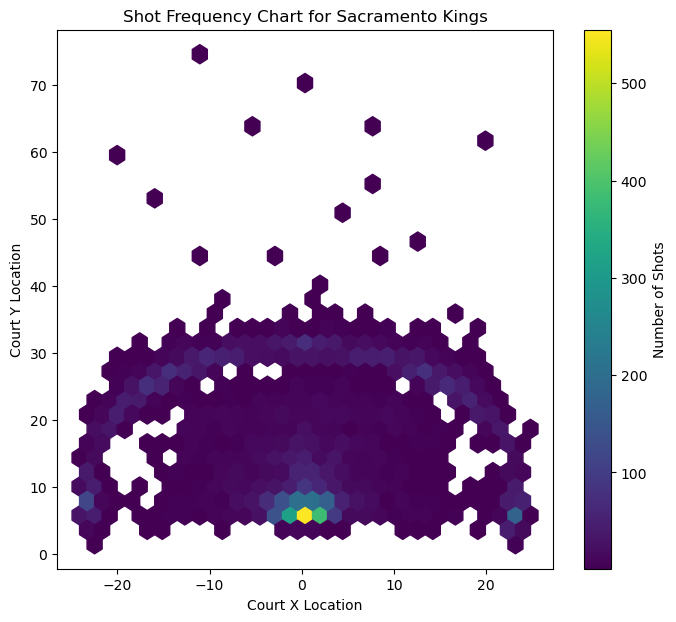

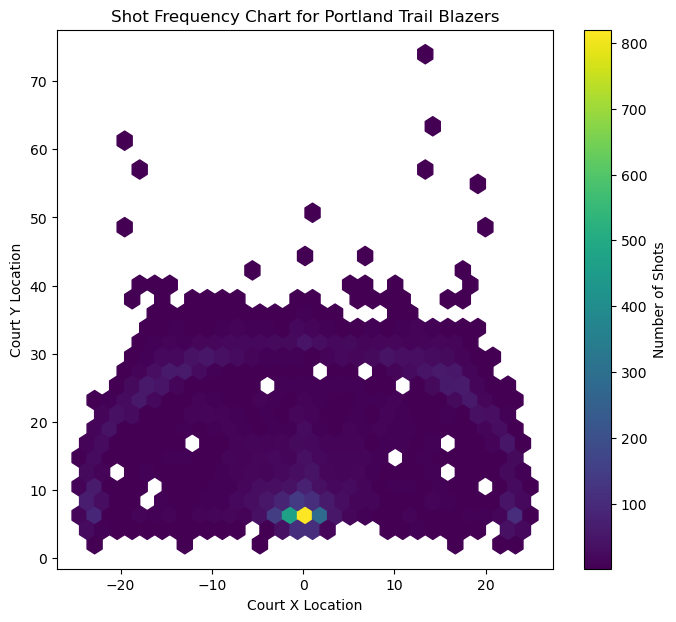

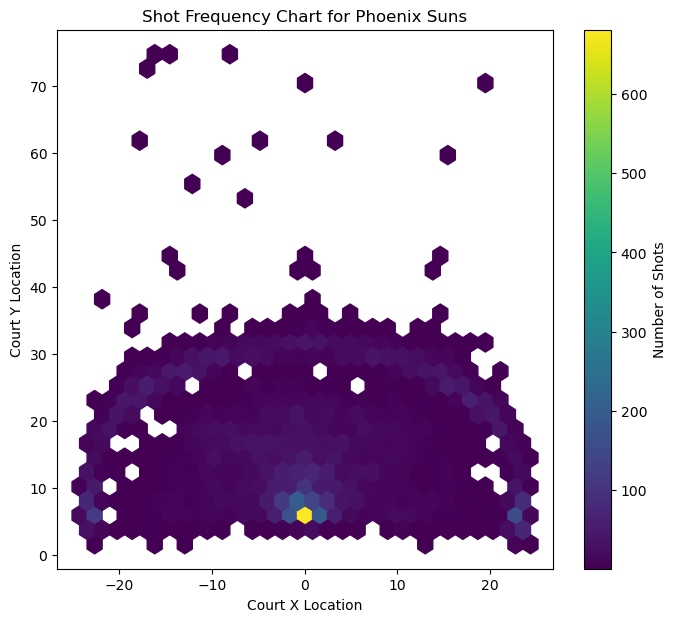

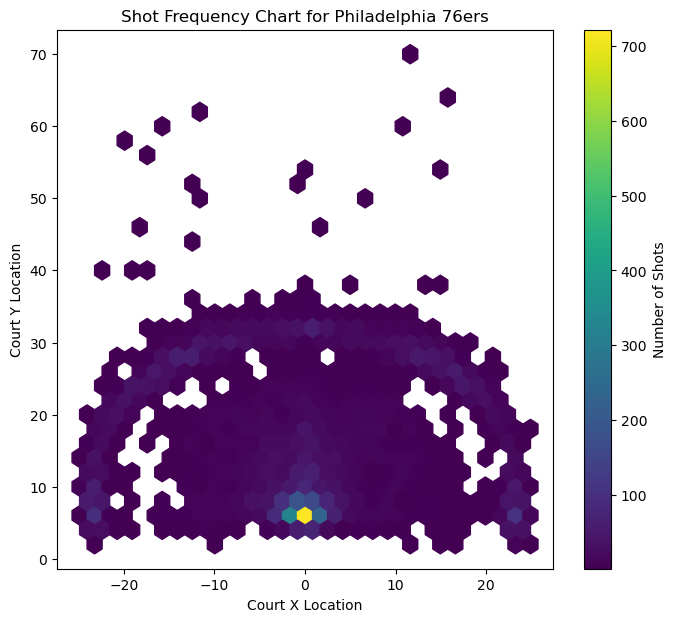

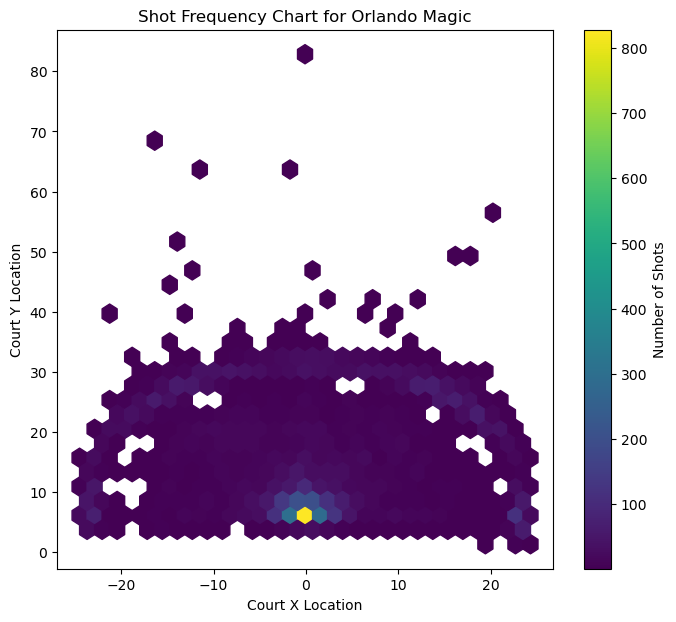

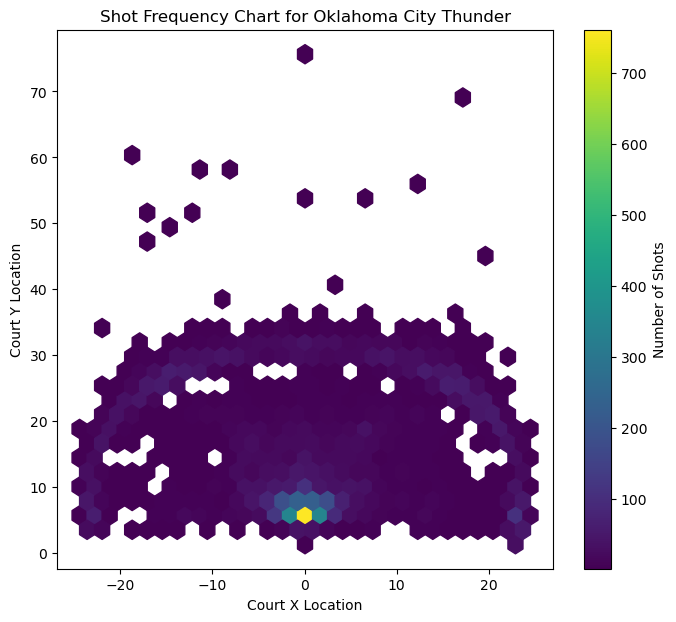

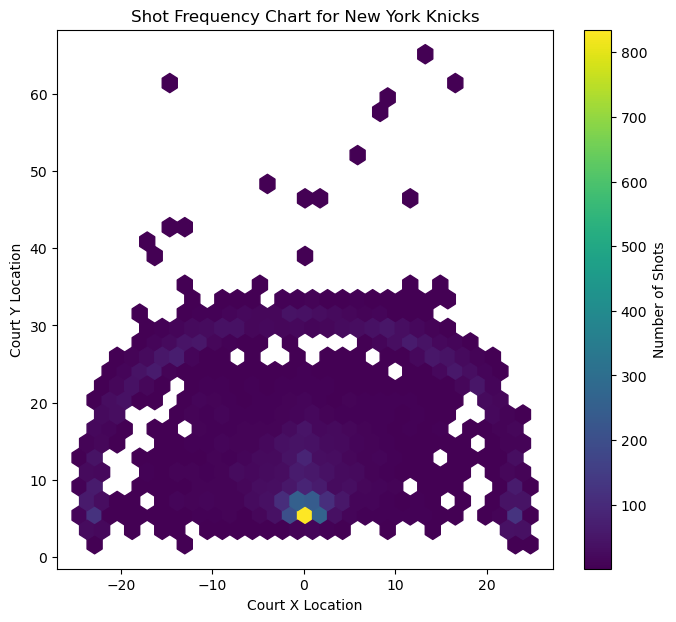

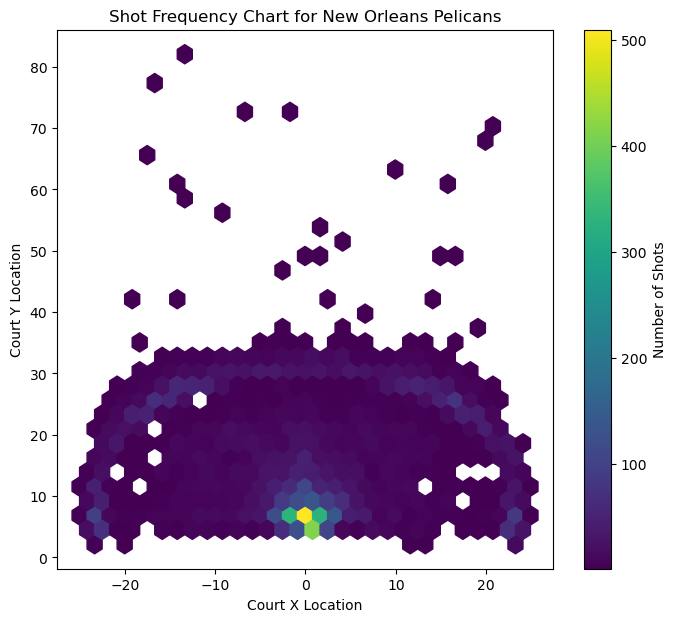

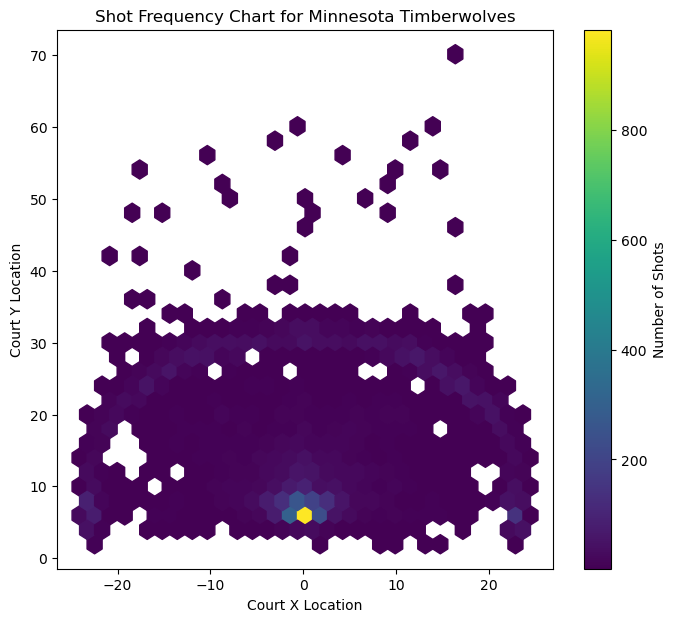

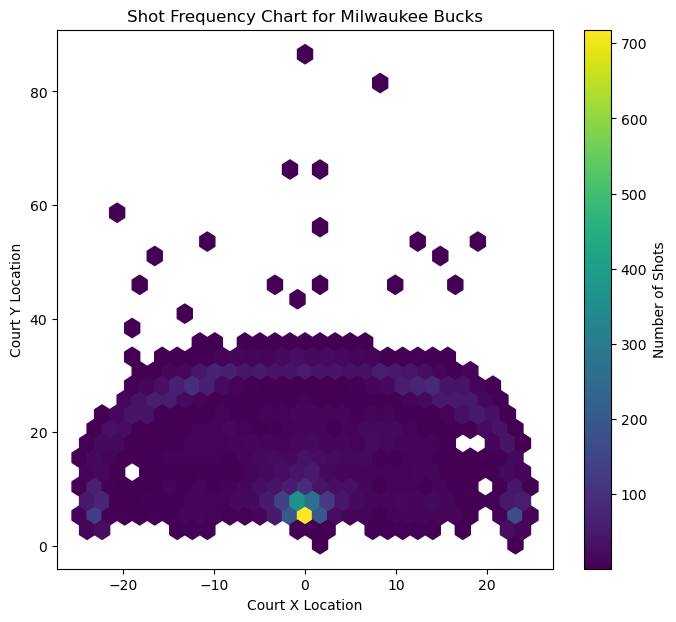

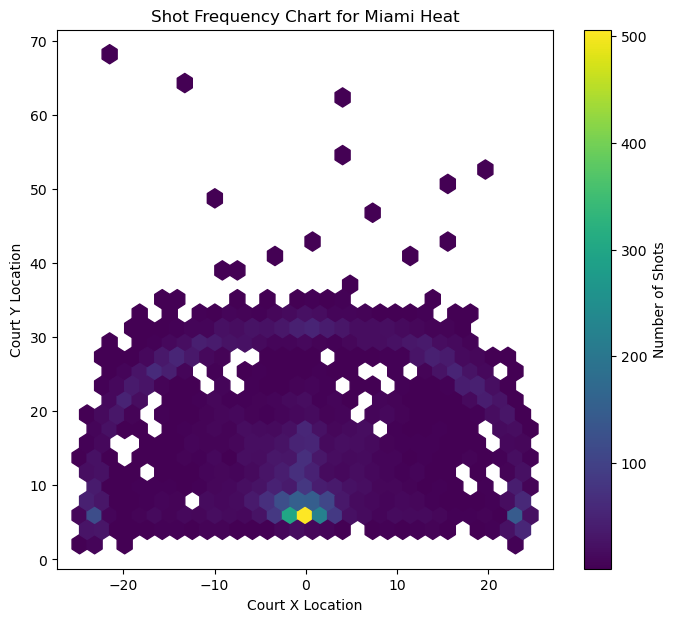

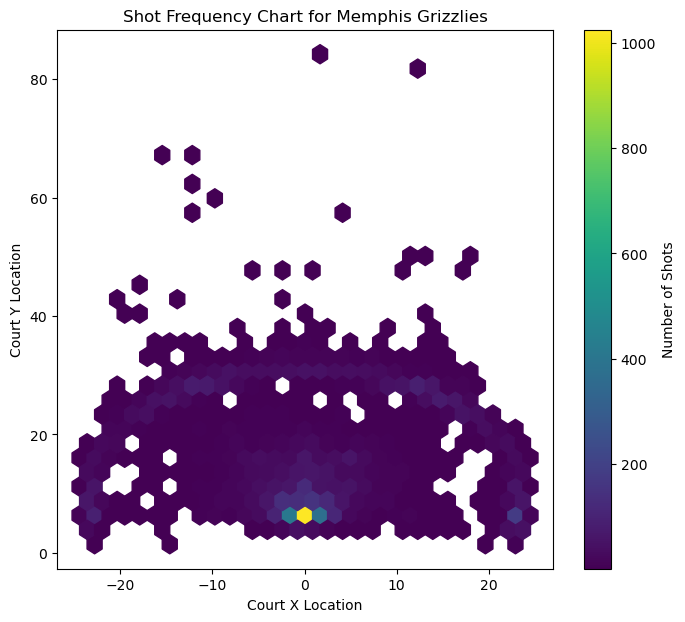

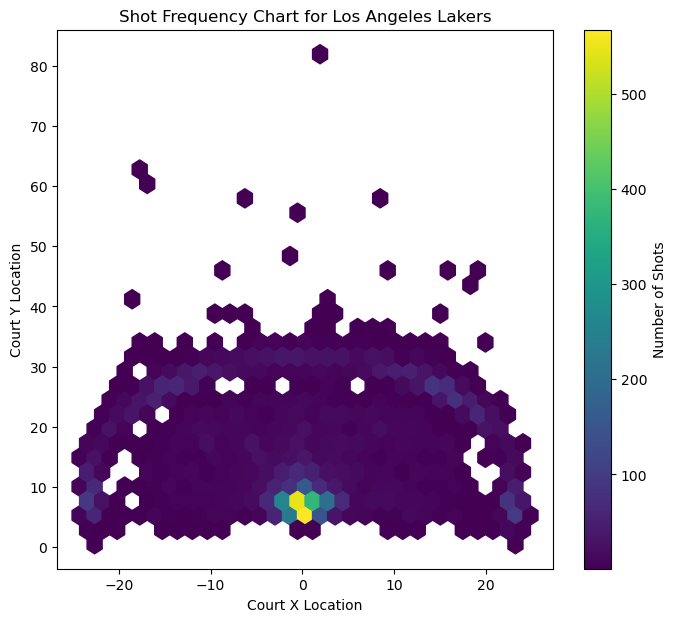

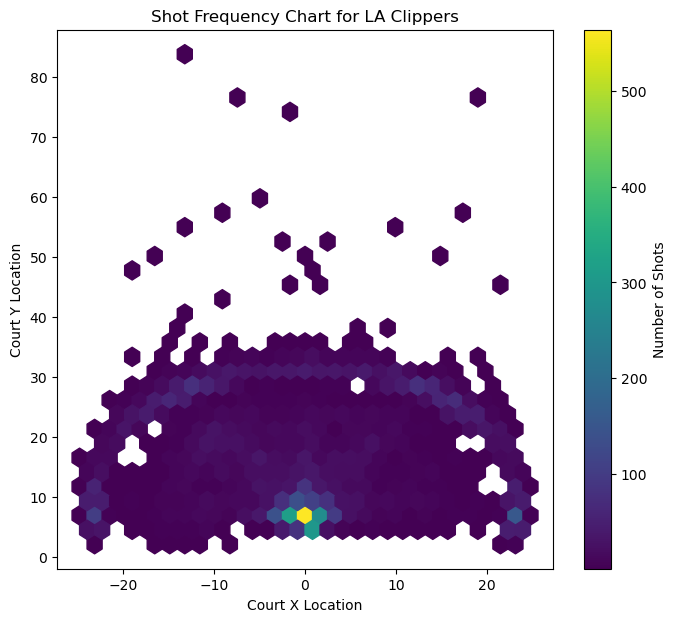

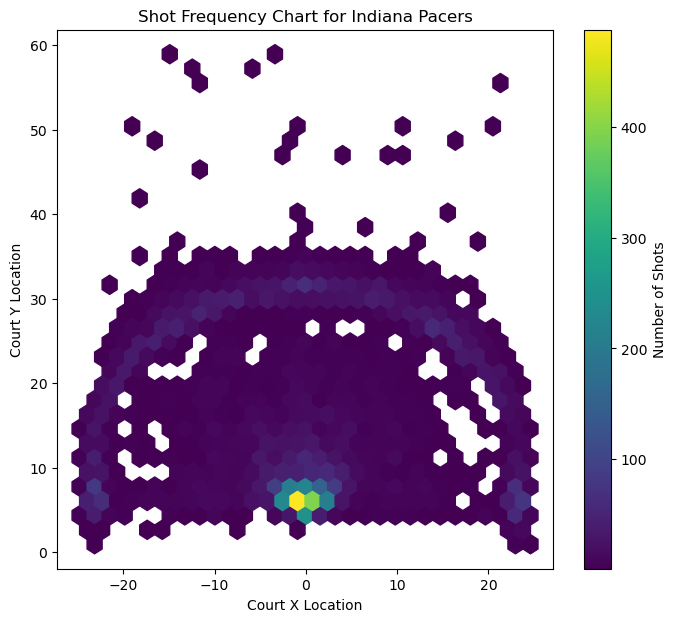

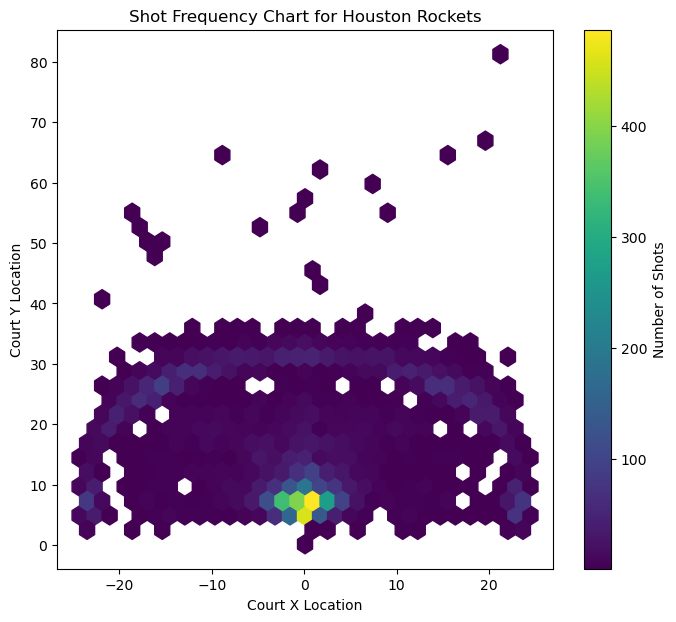

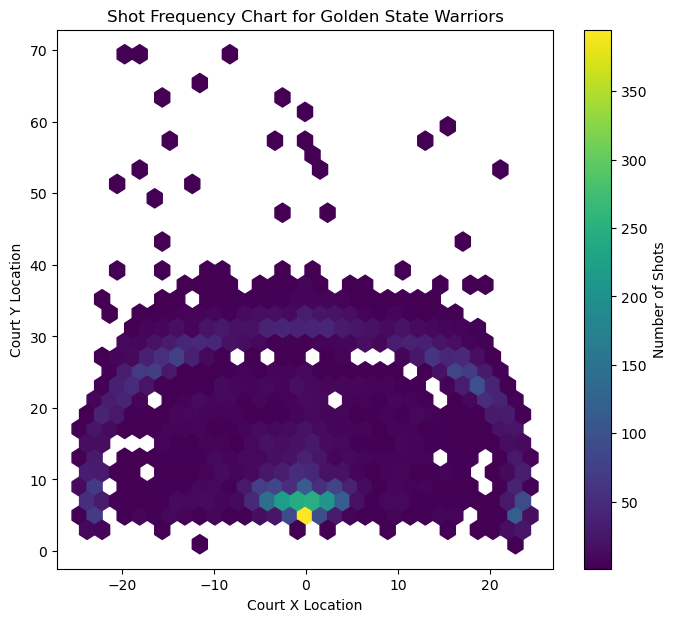

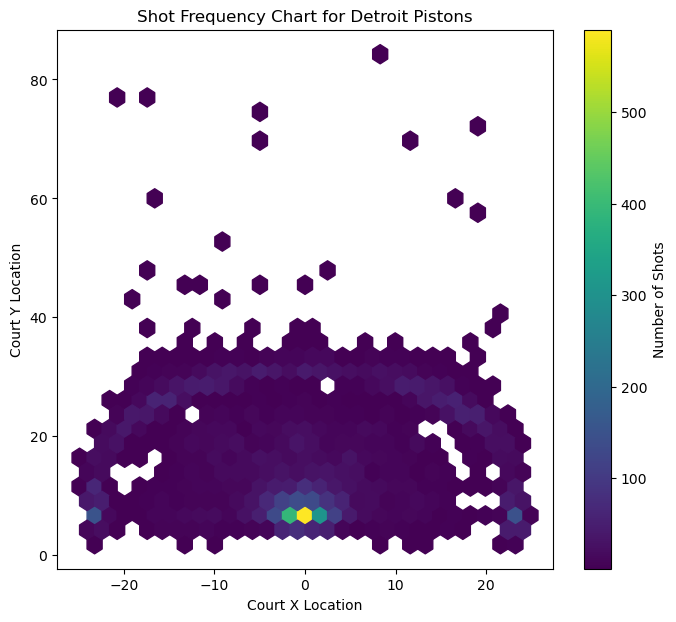

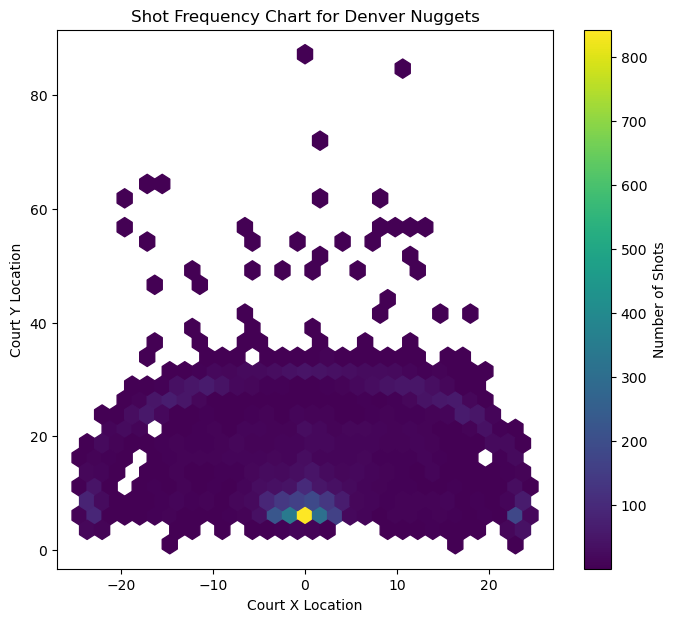

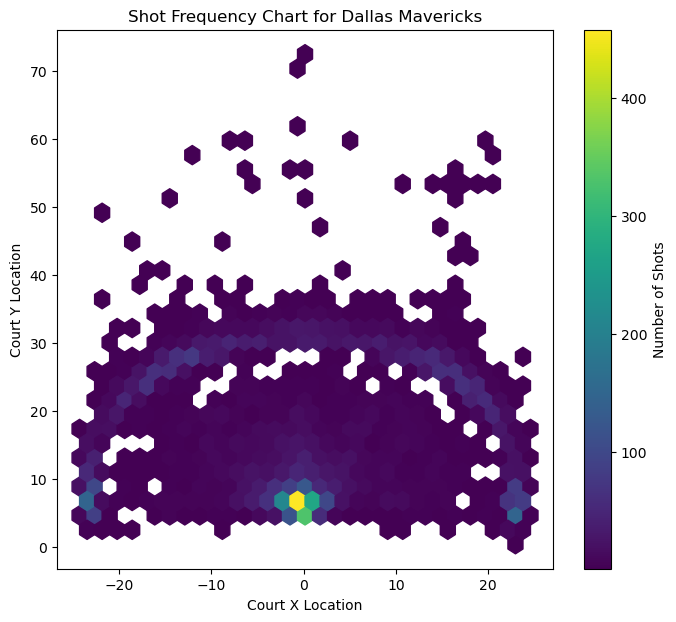

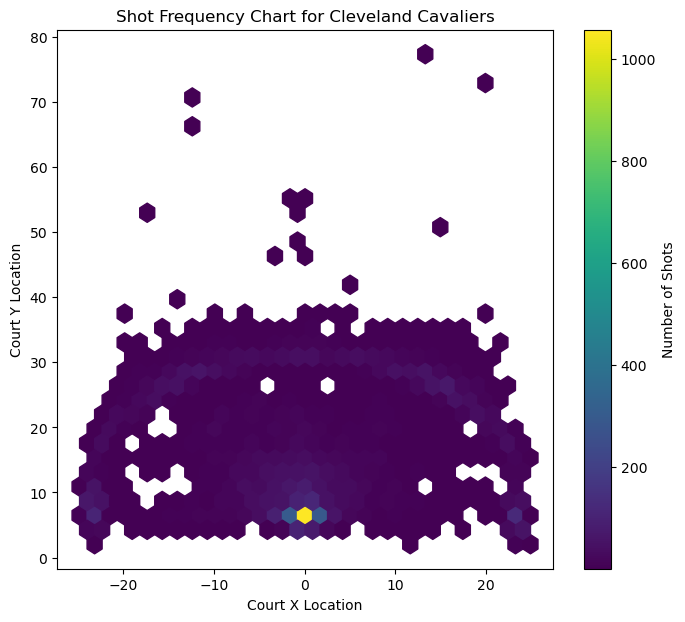

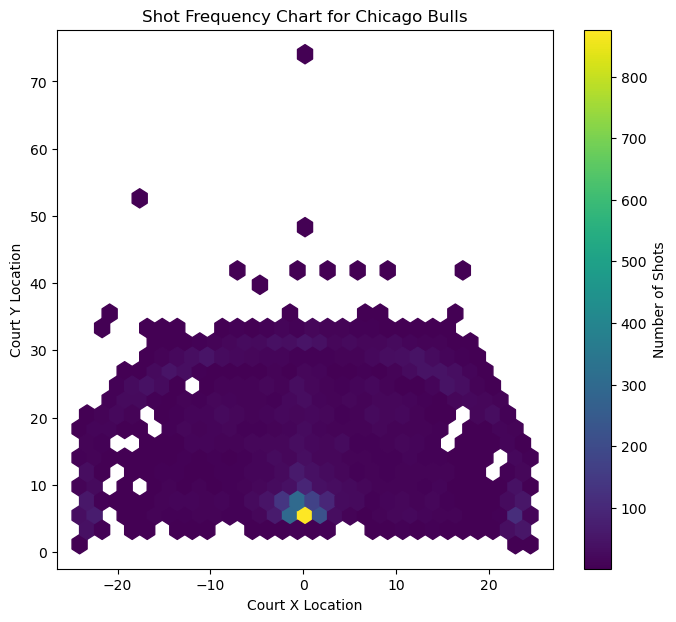

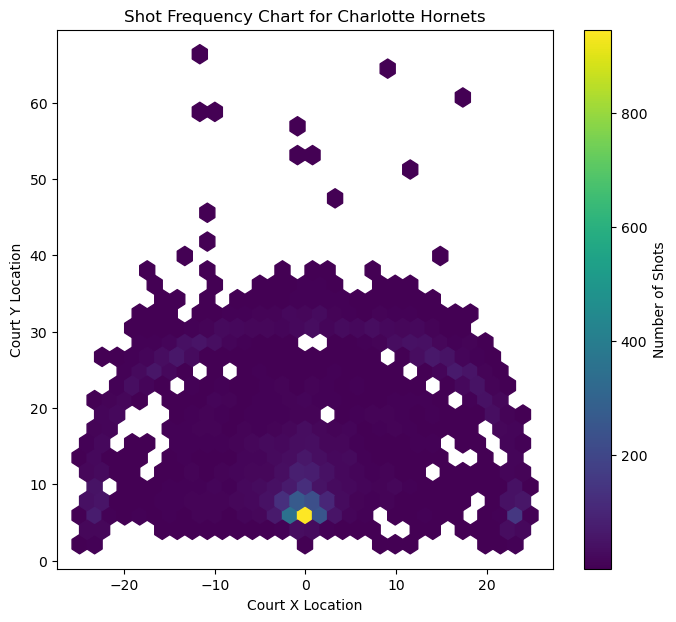

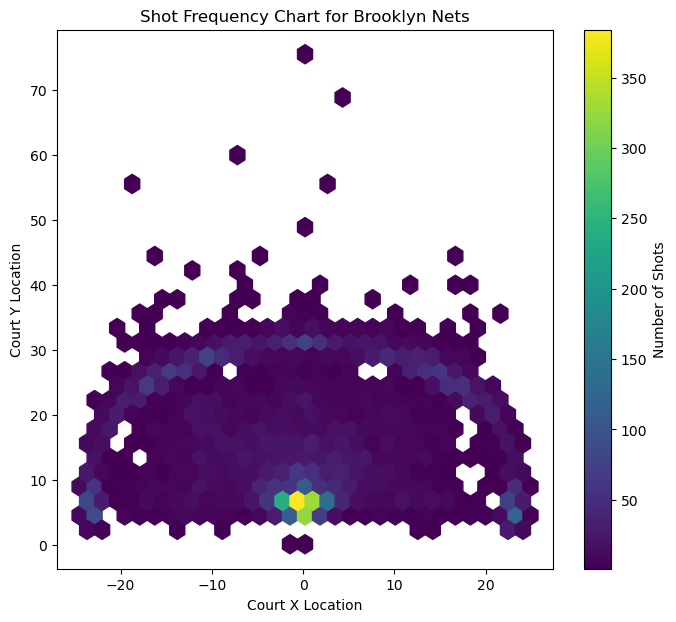

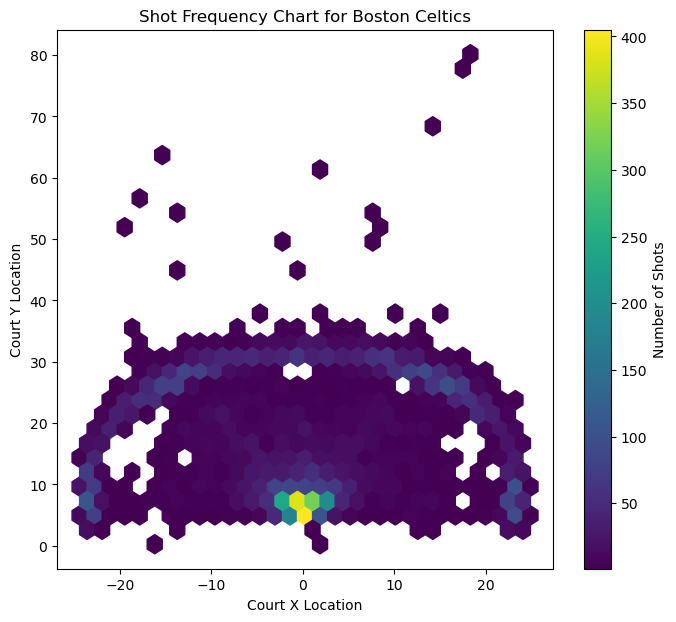

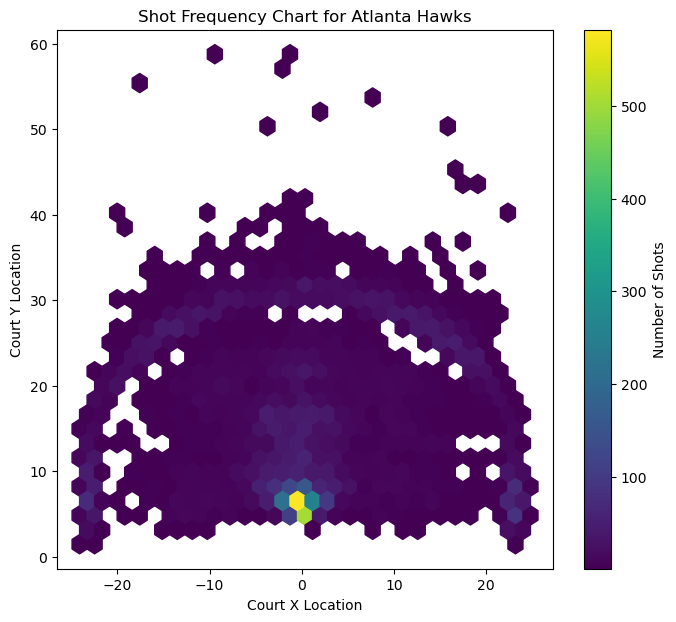

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from pathlib import Path

# Starting in .../Project-8---Sports-Analysis/code/notebooks, go up two levels to reach the project root.
base_dir = Path.cwd().parent.parent

# Build the complete path to the CSV file
csv_path = base_dir / "data" / "rawdata" / "NBA_2023_Shots.csv"

img_path = base_dir / "docs" / "figures" / "2023_shots"

print(f"CSV path: {csv_path}")

# Load the CSV file into a DataFrame
df = pd.read_csv(csv_path)

# Optionally, inspect the first few rows to ensure data is loaded correctly
print(df.head())

# Get a list of unique teams based on the TEAM_NAME column.
teams = df["TEAM_NAME"].unique()

# Loop through each team, create and save a shot frequency chart
for team in teams:
    # Filter data for the team
    team_df = df[df["TEAM_NAME"] == team]
    
    # Create a new figure for the team's shot chart
    plt.figure(figsize=(8, 7))
    
    # Create a hexbin plot of shot locations (using LOC_X and LOC_Y).
    # 'gridsize' controls the number of hexagons in the x-direction (increase for finer resolution).
    hb = plt.hexbin(team_df["LOC_X"], team_df["LOC_Y"], gridsize=30, cmap="viridis", mincnt=1)
    
    # Add a color bar indicating the shot frequency
    cb = plt.colorbar(hb)
    cb.set_label("Number of Shots")
    
    # Set plot title and labels
    plt.title(f"Shot Frequency Chart for {team}")
    plt.xlabel("Court X Location")
    plt.ylabel("Court Y Location")
    
    # Optionally, adjust the axis limits to match the dimensions of an NBA court (if desired).
    # For example, if your coordinate system is centered at the hoop or baseline, you may adjust as needed:
    # plt.xlim(-25, 25)
    # plt.ylim(0, 47)
    
    # Save the figure as a PNG file with the team name included
    plt.savefig(f"{img_path}/shot_chart_{team.replace(' ', '_')}.png", bbox_inches="tight")
    
    # Display the plot (this is optional if running in a script)
    plt.show()

    # Close the figure to free memory before processing the next team
    plt.close()
